In [2]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import pandas
import random

import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline
from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex
import matplotlib as mpl

from sklearn.linear_model import LinearRegression

## 4.1

### Solution

In [3]:
SSE = 500
SSB = 250
replicates = 6


## 4.9.  Be sure to include residual plots verifying your analysis

### Solution

In [39]:
data = np.array([[13, 22, 18, 39],
                 [16, 24, 17, 44],
                 [5,  4,  1,  22]])
a = 3
b = 4
N = a*b

# Calculate SST
data_mean = np.mean(data)
data_sum = np.sum(data)
data_squared = np.square(data)
data_squared_sum = np.sum(data_squared)

SST = data_squared_sum - ((data_sum*data_sum)/N)
display(md("SST: {}".format(SST)))

# Calculate SSTreatments
treat_sum = np.sum(data, axis=1) # Array of sum of each row
SSTreat = (1/b)*np.sum(np.square(treat_sum)) - ((data_sum*data_sum)/N)
display(md("SSTreatments: {}".format(SSTreat)))

# Calculate SSBlocks
block_sum = np.sum(data, axis=0) # Array of sum of each column
SSB = (1/a)*np.sum(np.square(block_sum)) - ((data_sum*data_sum)/N)
display(md("SSBlocks: {:.4f}".format(SSB)))

# Calculate SSE
SSE = SST - SSTreat - SSB
display(md("SSE: {:.4f}".format(SSE)))

MSTreat = SSTreat/(a-1)
MSE = SSE/((a-1)*(b-1))
F0 = MSTreat/MSE
display(md("MSTreat: {:.4f}".format(MSTreat)))
display(md("MSE: {:.4f}".format(MSE)))
display(md("F0: {:.4f}".format(F0)))
f_crit = stats.f.ppf(1-0.05,a-1,b-1)
display(md("FCrit: {:.3f}".format(f_crit)))
p_val = 1-stats.f.cdf(F0,MSTreat,MSE)
display(md("p-value: {}".format(p_val)))

SST: 1862.25

SSTreatments: 703.5

SSBlocks: 1106.9167

SSE: 51.8333

MSTreat: 351.7500

MSE: 8.6389

F0: 40.7170

FCrit: 9.552

p-value: 1.5021820726213164e-06

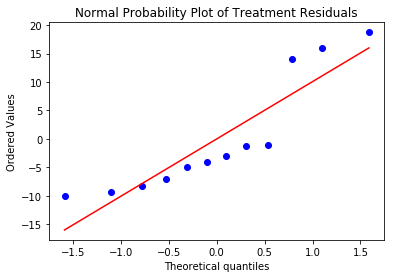

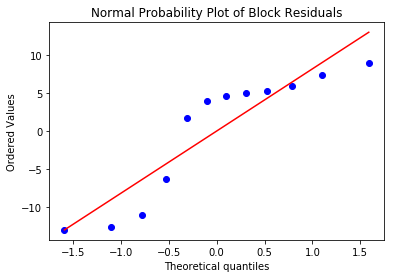

In [49]:
treatment_means = np.mean(data, axis=1)
block_means = np.mean(data, axis=0)

treat_resid_1 = data[0] - treatment_means[0]
treat_resid_2 = data[1] - treatment_means[1]
treat_resid_3 = data[2] - treatment_means[2]
treat_resid = np.hstack((treat_resid_1, treat_resid_2, treat_resid_3))

stats.probplot(treat_resid, plot=plt)
plt.title("Normal Probability Plot of Treatment Residuals")
plt.show()

block_resid_1 = data[:,0] - block_means[0]
block_resid_2 = data[:,1] - block_means[1]
block_resid_3 = data[:,2] - block_means[2]
block_resid_4 = data[:,3] - block_means[3]
block_resid = np.hstack((block_resid_1, block_resid_2, block_resid_3, block_resid_4))
stats.probplot(block_resid, plot=plt)
plt.title("Normal Probability Plot of Block Residuals")
plt.show()

### Answer

Based on the value of $F_0 = 40.7 > 9.552 \approx F_{0.05, 2,3}$ we can reject $H_0$. Thus, we can say that the solutions do have different effects on the bacteria growth. 

## 4.16

## 4.19

## 5.4

## 5.13

## 5.35